In [3]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import PIL
import scipy as sp
from scipy.stats import entropy



3.7963061515947576


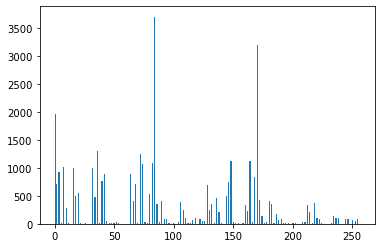

In [5]:

Photo=PIL.Image.open("photo.bmp")
Photo=Photo.resize((512,512))
Photo=Photo.convert(mode="1",dither=PIL.Image.FLOYDSTEINBERG)
Photo.show()
a = np.asarray(Photo)

#post
xt = 0.01361291 
P= 0.153
l = 3.74

np.set_printoptions(precision=3)
HMap=np.empty(262144)
i=0
j=0
while i < (512*512)+200: 
    if  xt < P:
        xt=(xt/P)
        if xt < 0:
            xt=-xt
        elif xt > 1:
            xt=xt-1
        if j>200:
            HMap[i-200]=xt
    elif P <= xt < 0.5:
        xt=((xt-P)/(0.5-P))
        if xt < 0:
            xt=-xt
        elif xt > 1:
            xt=xt-1
        if j>200:
            HMap[i-200]=xt
    elif 0.5 <= xt < 1-P:
        xt=((1-xt-0.5)/(0.5-P))
        if xt < 0:
            xt=-xt
        elif xt > 1:
            xt=xt-1
        if j>200:
            HMap[i-200]=xt
    elif 1-P <= xt :
        xt=((1-xt)/P)
        if xt < 0:
            xt=-xt
        elif xt > 1:
            xt=xt-1
        if j>200:
            HMap[i-200]=xt
    i=i+1
    j=j+1



#for x in HMap:
new = np.reshape(HMap,(512,512))

MatrixR=np.empty(shape=(512,512))
MatrixA=np.empty(shape=(512,512))
temp=np.empty(512)

i=0
while i < 512:
        i+=1
        temp[i-1]=i

i=0
while i < 512:
    MatrixR[i]=temp
    i+=1


i=0

while i < 512:
    j=0
    while j < 512:
        j+=1
        temp[j-1]=i+1
    MatrixA[i]=temp
    i+=1

 







b=[]
c=0
d=0
for x in a:
    for y in x:
        c+=1
        d+=y
        d=d<<1
        if c == 7:
            c=0
            #print(str(d)+'\n')
            b.append(d)
            d=0


figImage , his = plt.subplots()
bins=255

his.hist(b,bins,range=[0,256])

def entropy1(labels, base=None):
    value,counts = np.unique(labels, return_counts=True)
    return entropy(counts, base=base)

print(entropy1(b))


    




